# Best Neighborhood to Open a Bakery (Or Other Dessert-type Venue)

## Introduction/Business Problem

#### Opening a business is a challenging task and in my quest to become a business owner, I need to know which businesses are thriving and in which neighborhoods. This project tries to create a content based recommendation system for assisting those entrepreneurs, like myself, in choosing a neighborhood basis ranked by a number of lifestyle categories. For testing this system, I will use Toronto (Canada) as an example city.

#### Although my business interest lies in opening a bakery or other dessert-type of venue, my recommendation system can be useful to entrepreneurs looking to open and/or invest in a variety of venues in Toronto. Recommendations will be based on an area’s popularity and currently operating venues.

## Data

#### For the purpose of this project I used data from two sources: I scrapped the Neighborhood/area data for Toronto from Wikipedia to create a list of Neighborhoods with geographical coordinates and then using the Foursquare (online venue recommendation platform) API, explored the venues listed in Toronto. 

##### Links to the data:
    List of Neighborhoods organized by Postal Codes: https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M
           - Description : This data set contains the required information and will be used to explore various neighborhoods of Toronto, narrowing down a specific area of Toronto to open a bakery. 
    List of Coordinates: http://cocl.us/Geospatial_data
            - Description:  By using this geo space data, I will be able to obtain boundaries that will help us visualize choropleth map.
    For the venue categories: Foursquare API https://developer.foursquare.com/docs/api/venues/explore
            - Description : By using this api I will identify the venues in each neighborhood thereby filtering the venues by bakeries and dessert-type venues.

## Analysis

### I will import the required libraries for python:

    - pandas and numpy for handling data.
    - request module for using FourSquare API.
    - geopy to get co-ordinates of Toronto.
    - folium to visualize the results on a map.

In [1]:
import numpy as np 

import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json 

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim 

import requests 
from pandas.io.json import json_normalize 


import matplotlib.cm as cm
import matplotlib.colors as colors


from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
import folium 

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    folium-0.5.0               |             py_0          45 KB  conda-forge
    altair-3.2.0               |           py36_0         770 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ca-certificates-2019.6.16  |       hecc5488_0         145 KB  conda-forge
    certifi-2019.6.16          |           py36_1         149 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.3 MB

The following NEW packages will be 

In [2]:
CLIENT_ID = 'K3RJR0KS13UE0SPFOOACI3XMLU3EXO35GLODIPJMEPGK2JPV' 
CLIENT_SECRET = '2DNCRAR5Y03W323U3D554NIKL2UOIE3TIIEMSKFU3SQN2Q3F' 
VERSION = '20180604'
LIMIT = 30

#### Building upon the Toronto data used in previous assignments

In [3]:
import requests
from bs4 import BeautifulSoup

In [44]:
website_url = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text

In [5]:
soup = BeautifulSoup(website_url, 'lxml')

In [45]:
My_table = soup.find('table',{'class':'wikitable sortable'})
My_table

<table class="wikitable sortable">
<tbody><tr>
<th>Postcode</th>
<th>Borough</th>
<th>Neighbourhood
</th></tr>
<tr>
<td>M1A</td>
<td>Not assigned</td>
<td>Not assigned
</td></tr>
<tr>
<td>M2A</td>
<td>Not assigned</td>
<td>Not assigned
</td></tr>
<tr>
<td>M3A</td>
<td><a href="/wiki/North_York" title="North York">North York</a></td>
<td><a href="/wiki/Parkwoods" title="Parkwoods">Parkwoods</a>
</td></tr>
<tr>
<td>M4A</td>
<td><a href="/wiki/North_York" title="North York">North York</a></td>
<td><a href="/wiki/Victoria_Village" title="Victoria Village">Victoria Village</a>
</td></tr>
<tr>
<td>M5A</td>
<td><a href="/wiki/Downtown_Toronto" title="Downtown Toronto">Downtown Toronto</a></td>
<td><a href="/wiki/Harbourfront_(Toronto)" title="Harbourfront (Toronto)">Harbourfront</a>
</td></tr>
<tr>
<td>M5A</td>
<td><a href="/wiki/Downtown_Toronto" title="Downtown Toronto">Downtown Toronto</a></td>
<td><a href="/wiki/Regent_Park" title="Regent Park">Regent Park</a>
</td></tr>
<tr>
<td>M6A</td>

In [46]:
table1=""
for tr in My_table.find_all('tr'):
    row1=""
    for tds in tr.find_all('td'):
        row1=row1+","+tds.text
    table1=table1+row1[1:]

In [47]:
headers="Postcode,Borough,Neighbourhood"
table_rows = My_table.find_all('tr')

res = []
for tr in table_rows:
    td = tr.find_all('td')
    row = [tr.text.strip() for tr in td if tr.text.strip()]
    if row:
        res.append(row)
df = pd.DataFrame(res, columns=["Postcode", "Borough", "Neighbourhood"])
df=df.rename(columns = {'Postcode':'Postal Code', 'Neighbourhood':'Neighborhood'})
df.head(10)

Postal Code           Borough      Neighborhood
0         M1A      Not assigned      Not assigned
1         M2A      Not assigned      Not assigned
2         M3A        North York         Parkwoods
3         M4A        North York  Victoria Village
4         M5A  Downtown Toronto      Harbourfront
5         M5A  Downtown Toronto       Regent Park
6         M6A        North York  Lawrence Heights
7         M6A        North York    Lawrence Manor
8         M7A      Queen's Park      Not assigned
9         M8A      Not assigned      Not assigned

In [9]:
indexNames = df[ df['Borough'] =='Not assigned'].index

df.drop(indexNames , inplace=True)

In [10]:
df.head(10)

Postal Code           Borough      Neighborhood
2          M3A        North York         Parkwoods
3          M4A        North York  Victoria Village
4          M5A  Downtown Toronto      Harbourfront
5          M5A  Downtown Toronto       Regent Park
6          M6A        North York  Lawrence Heights
7          M6A        North York    Lawrence Manor
8          M7A      Queen's Park      Not assigned
10         M9A         Etobicoke  Islington Avenue
11         M1B       Scarborough             Rouge
12         M1B       Scarborough           Malvern

In [11]:
result = df.groupby(['Postal Code','Borough'], sort=False).agg( ', '.join)

df_new=result.reset_index()
df_new.head(15)

Postal Code           Borough  \
0          M3A        North York   
1          M4A        North York   
2          M5A  Downtown Toronto   
3          M6A        North York   
4          M7A      Queen's Park   
5          M9A         Etobicoke   
6          M1B       Scarborough   
7          M3B        North York   
8          M4B         East York   
9          M5B  Downtown Toronto   
10         M6B        North York   
11         M9B         Etobicoke   
12         M1C       Scarborough   
13         M3C        North York   
14         M4C         East York   

                                         Neighborhood  
0                                           Parkwoods  
1                                    Victoria Village  
2                           Harbourfront, Regent Park  
3                    Lawrence Heights, Lawrence Manor  
4                                        Not assigned  
5                                    Islington Avenue  
6                                      Rouge, Malvern  
7                                     Don Mills North  
8                     Woodbine Gardens, Parkview Hill  
9                            Ryerson, Garden District  
10                                          Glencairn  
11  Cloverdale, Islington, Martin Grove, Princess ...  
12             Highland Creek, Rouge Hill, Port Union  
13                   Flemingdon Park, Don Mills South  
14                                   Woodbine Heights

In [12]:
df_new.shape

(103, 3)

In [13]:
!wget -q -O 'Toronto_long_lat_data.csv'  http://cocl.us/Geospatial_data
df_lon_lat = pd.read_csv('Toronto_long_lat_data.csv')
df_lon_lat.head()

Postal Code   Latitude  Longitude
0         M1B  43.806686 -79.194353
1         M1C  43.784535 -79.160497
2         M1E  43.763573 -79.188711
3         M1G  43.770992 -79.216917
4         M1H  43.773136 -79.239476

In [14]:
df_lon_lat.columns=['Postal Code','Latitude','Longitude']

In [15]:
df_lon_lat.head()

Postal Code   Latitude  Longitude
0         M1B  43.806686 -79.194353
1         M1C  43.784535 -79.160497
2         M1E  43.763573 -79.188711
3         M1G  43.770992 -79.216917
4         M1H  43.773136 -79.239476

In [16]:
Toronto_df = pd.merge(df_new,
                 df_lon_lat[['Postal Code','Latitude', 'Longitude']],
                 on='Postal Code')
Toronto_df

Postal Code           Borough  \
0           M3A        North York   
1           M4A        North York   
2           M5A  Downtown Toronto   
3           M6A        North York   
4           M7A      Queen's Park   
5           M9A         Etobicoke   
6           M1B       Scarborough   
7           M3B        North York   
8           M4B         East York   
9           M5B  Downtown Toronto   
10          M6B        North York   
11          M9B         Etobicoke   
12          M1C       Scarborough   
13          M3C        North York   
14          M4C         East York   
15          M5C  Downtown Toronto   
16          M6C              York   
17          M9C         Etobicoke   
18          M1E       Scarborough   
19          M4E      East Toronto   
20          M5E  Downtown Toronto   
21          M6E              York   
22          M1G       Scarborough   
23          M4G         East York   
24          M5G  Downtown Toronto   
25          M6G  Downtown Toronto   
26          M1H       Scarborough   
27          M2H        North York   
28          M3H        North York   
29          M4H         East York   
30          M5H  Downtown Toronto   
31          M6H      West Toronto   
32          M1J       Scarborough   
33          M2J        North York   
34          M3J        North York   
35          M4J         East York   
36          M5J  Downtown Toronto   
37          M6J      West Toronto   
38          M1K       Scarborough   
39          M2K        North York   
40          M3K        North York   
41          M4K      East Toronto   
42          M5K  Downtown Toronto   
43          M6K      West Toronto   
44          M1L       Scarborough   
45          M2L        North York   
46          M3L        North York   
47          M4L      East Toronto   
48          M5L  Downtown Toronto   
49          M6L        North York   
50          M9L        North York   
51          M1M       Scarborough   
52          M2M        North York   
53          M3M        North York   
54          M4M      East Toronto   
55          M5M        North York   
56          M6M              York   
57          M9M        North York   
58          M1N       Scarborough   
59          M2N        North York   
60          M3N        North York   
61          M4N   Central Toronto   
62          M5N   Central Toronto   
63          M6N              York   
64          M9N              York   
65          M1P       Scarborough   
66          M2P        North York   
67          M4P   Central Toronto   
68          M5P   Central Toronto   
69          M6P      West Toronto   
70          M9P         Etobicoke   
71          M1R       Scarborough   
72          M2R        North York   
73          M4R   Central Toronto   
74          M5R   Central Toronto   
75          M6R      West Toronto   
76          M7R       Mississauga   
77          M9R         Etobicoke   
78          M1S       Scarborough   
79          M4S   Central Toronto   
80          M5S  Downtown Toronto   
81          M6S      West Toronto   
82          M1T       Scarborough   
83          M4T   Central Toronto   
84          M5T  Downtown Toronto   
85          M1V       Scarborough   
86          M4V   Central Toronto   
87          M5V  Downtown Toronto   
88          M8V         Etobicoke   
89          M9V         Etobicoke   
90          M1W       Scarborough   
91          M4W  Downtown Toronto   
92          M5W  Downtown Toronto   
93          M8W         Etobicoke   
94          M9W         Etobicoke   
95          M1X       Scarborough   
96          M4X  Downtown Toronto   
97          M5X  Downtown Toronto   
98          M8X         Etobicoke   
99          M4Y  Downtown Toronto   
100         M7Y      East Toronto   
101         M8Y         Etobicoke   
102         M8Z         Etobicoke   

                                          Neighborhood   Latitude  Longitude  
0                                            Parkwoods  43.753259 -79.329656

In [17]:
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="Toronto")
location = geolocator.geocode(address)
latitude_toronto = location.latitude
longitude_toronto = location.longitude
print('The geographical coordinate of Toronto are {}, {}.'.format(latitude_toronto, longitude_toronto))

The geographical coordinate of Toronto are 43.653963, -79.387207.


#### Mapping the Toronto metropolitan area

In [18]:
map_toronto = folium.Map(location=[latitude_toronto, longitude_toronto], zoom_start=10)

# add markers to map
for lat, lng, borough, Neighborhood in zip(Toronto_df['Latitude'], Toronto_df['Longitude'], Toronto_df['Borough'], Toronto_df['Neighborhood']):
    label = '{}, {}'.format(Neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [19]:

import matplotlib.pyplot as plt

plt.figure(figsize=(9,5))
# title
plt.title('Number of Neighborhoods in Toronto')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Neighborhood', fontsize=15)
#giving a bar plot
df.groupby('Borough')['Neighborhood'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

<Figure size 900x500 with 1 Axes>

#### Etobicoke has the largest number of neighborhoods in Toronto.  

## Identifying the number of bakeries per neighborhood

In [20]:
radius=500
LIMIT=100

In [21]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [22]:
toronto_venues = getNearbyVenues(names=Toronto_df['Neighborhood'],
                                   latitudes=Toronto_df['Latitude'],
                                   longitudes=Toronto_df['Longitude']
                                  )

Parkwoods
Victoria Village
Harbourfront, Regent Park
Lawrence Heights, Lawrence Manor
Not assigned
Islington Avenue
Rouge, Malvern
Don Mills North
Woodbine Gardens, Parkview Hill
Ryerson, Garden District
Glencairn
Cloverdale, Islington, Martin Grove, Princess Gardens, West Deane Park
Highland Creek, Rouge Hill, Port Union
Flemingdon Park, Don Mills South
Woodbine Heights
St. James Town
Humewood-Cedarvale
Bloordale Gardens, Eringate, Markland Wood, Old Burnhamthorpe
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Downsview North, Wilson Heights
Thorncliffe Park
Adelaide, King, Richmond
Dovercourt Village, Dufferin
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto
Harbourfront East, Toronto Islands, Union Station
Little Portugal, Trinity
East Birchmount Park, Ionview, Kennedy Park
Bayview Village
CFB Toronto, Downsview East
The D

In [23]:
# prepare neighborhood list that contains bakeries
column_names=['Borough', 'Neighborhood', 'ID','Name']
bakeries_toronto=pd.DataFrame(columns=column_names)
count=1
for row in df.values.tolist():
    Borough, Neighborhood, ID = row
    venues = toronto_venues
    bakeries=venues[venues['Venue Category']=='Bakery']   
    print('(',count,'/',len(df),')','Bakeries '+Neighborhood+', '+Borough+':'+str(len(bakeries)))
    for restaurant_detail in bakeries.values.tolist():
        *id, name , category = restaurant_detail
        bakeries_toronto = bakeries_toronto.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 211 ) Bakeries North York, M3A:50
( 2 / 211 ) Bakeries North York, M4A:50
( 3 / 211 ) Bakeries Downtown Toronto, M5A:50
( 4 / 211 ) Bakeries Downtown Toronto, M5A:50
( 5 / 211 ) Bakeries North York, M6A:50
( 6 / 211 ) Bakeries North York, M6A:50
( 7 / 211 ) Bakeries Queen's Park, M7A:50
( 8 / 211 ) Bakeries Etobicoke, M9A:50
( 9 / 211 ) Bakeries Scarborough, M1B:50
( 10 / 211 ) Bakeries Scarborough, M1B:50
( 11 / 211 ) Bakeries North York, M3B:50
( 12 / 211 ) Bakeries East York, M4B:50
( 13 / 211 ) Bakeries East York, M4B:50
( 14 / 211 ) Bakeries Downtown Toronto, M5B:50
( 15 / 211 ) Bakeries Downtown Toronto, M5B:50
( 16 / 211 ) Bakeries North York, M6B:50
( 17 / 211 ) Bakeries Etobicoke, M9B:50
( 18 / 211 ) Bakeries Etobicoke, M9B:50
( 19 / 211 ) Bakeries Etobicoke, M9B:50
( 20 / 211 ) Bakeries Etobicoke, M9B:50
( 21 / 211 ) Bakeries Etobicoke, M9B:50
( 22 / 211 ) Bakeries Scarborough, M1C:50
( 23 / 211 ) Bakeries Scarborough, M1C:50
( 24 / 211 ) Bakeries Scarborough, M1C:50
( 

In [24]:
bakeries_toronto.head()

Borough Neighborhood                                                 ID  \
0     M3A   North York  [Harbourfront, Regent Park, 43.6542599, -79.36...   
1     M3A   North York  [Harbourfront, Regent Park, 43.6542599, -79.36...   
2     M3A   North York  [Harbourfront, Regent Park, 43.6542599, -79.36...   
3     M3A   North York  [Ryerson, Garden District, 43.6571618, -79.378...   
4     M3A   North York  [Ryerson, Garden District, 43.6571618, -79.378...   

        Name  
0 -79.362017  
1 -79.359539  
2 -79.358709  
3 -79.380740  
4 -79.384298

In [25]:
bakeries_toronto.shape

(10550, 4)

### There are 10,550 bakeries across Toronto.

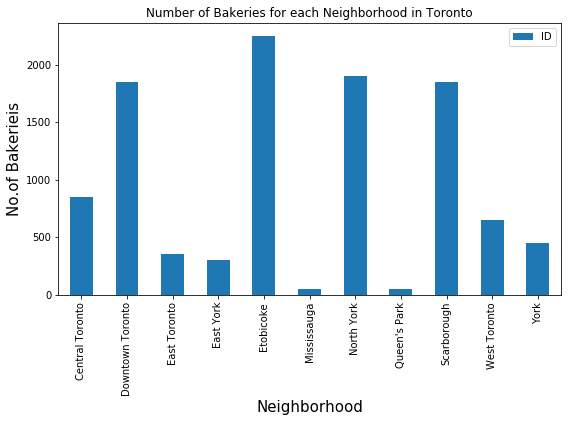

In [26]:
plt.figure(figsize=(9,5))
# title
plt.title('Number of Bakeries for each Neighborhood in Toronto')
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('No.of Bakerieis', fontsize=15)
#giving a bar plot
bakeries_toronto.groupby('Neighborhood')['ID'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

### Etobicoke has the most bakeries in Toronto and both Mississauga and Queen's Park have the least

#### Analyzing each neighborhood

In [27]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot.head()

Accessories Store  Afghan Restaurant  Airport  Airport Food Court  \
0                  0                  0        0                   0   
1                  0                  0        0                   0   
2                  0                  0        0                   0   
3                  0                  0        0                   0   
4                  0                  0        0                   0   

   Airport Gate  Airport Lounge  Airport Service  Airport Terminal  \
0             0               0                0                 0   
1             0               0                0                 0   
2             0               0                0                 0   
3             0               0                0                 0   
4             0               0                0                 0   

   American Restaurant  Antique Shop  Aquarium  Art Gallery  Art Museum  \
0                    0             0         0            0           0   
1                    0             0         0            0           0   
2                    0             0         0            0           0   
3                    0             0         0            0           0   
4                    0             0         0            0           0   

   Arts & Crafts Store  Asian Restaurant  Athletics & Sports  Auto Garage  \
0                    0                 0                   0            0   
1                    0                 0                   0            0   
2                    0                 0                   0            0   
3                    0                 0                   0            0   
4                    0                 0                   0            0   

   Auto Workshop  BBQ Joint  Baby Store  Bagel Shop  Bakery  Bank  Bar  \
0              0          0           0           0       0     0    0   
1              0          0           0           0       0     0    0   
2              0          0           0           0       0     0    0   
3              0          0           0           0       0     0    0   
4              0          0           0           0       0     0    0   

   Baseball Field  Baseball Stadium  Basketball Court  Basketball Stadium  \
0               0                 0                 0                   0   
1               0                 0                 0                   0   
2               0                 0                 0                   0   
3               0                 0                 0                   0   
4               0                 0                 0                   0   

   Beach  Bed & Breakfast  Beer Bar  Beer Store  Belgian Restaurant  \
0      0                0         0           0                   0   
1      0                0         0           0                   0   
2      0                0         0           0                   0   
3      0                0         0           0                   0   
4      0                0         0           0                   0   

   Bike Shop  Bistro  Boat or Ferry  Bookstore  Boutique  \
0          0       0              0          0         0   
1          0       0              0          0         0   
2          0       0              0          0         0   
3          0       0              0          0         0   
4          0       0              0          0         0   

   Brazilian Restaurant  Breakfast Spot  Brewery  Bridal Shop  \
0                     0               0        0            0   
1                     0               0        0            0   
2                     0               0        0            0   
3                     0               0        0            0   
4                     0               0        0            0   

   Bubble Tea Shop  Building  Burger Joint  Burrito Place  Bus Line  \
0                0         0             0              0         0   
1     

In [28]:
toronto_onehot.shape

(2249, 277)

#### Taking the mean frequency of the frequency of occurence of each category

In [29]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

Neighborhood  Accessories Store  \
0                             Adelaide, King, Richmond           0.000000   
1                                            Agincourt           0.000000   
2    Agincourt North, L'Amoreaux East, Milliken, St...           0.000000   
3    Albion Gardens, Beaumond Heights, Humbergate, ...           0.000000   
4                               Alderwood, Long Branch           0.000000   
5      Bathurst Manor, Downsview North, Wilson Heights           0.000000   
6                                      Bayview Village           0.000000   
7                    Bedford Park, Lawrence Manor East           0.000000   
8                                          Berczy Park           0.000000   
9                          Birch Cliff, Cliffside West           0.000000   
10   Bloordale Gardens, Eringate, Markland Wood, Ol...           0.000000   
11        Brockton, Exhibition Place, Parkdale Village           0.000000   
12   Business Reply Mail Processing Centre 969 Eastern           0.000000   
13                         CFB Toronto, Downsview East           0.000000   
14   CN Tower, Bathurst Quay, Island airport, Harbo...           0.000000   
15                         Cabbagetown, St. James Town           0.000000   
16                                 Caledonia-Fairbanks           0.000000   
17               Canada Post Gateway Processing Centre           0.000000   
18                                           Cedarbrae           0.000000   
19                                  Central Bay Street           0.000000   
20           Chinatown, Grange Park, Kensington Market           0.000000   
21                                            Christie           0.000000   
22                                Church and Wellesley           0.000000   
23                     Clairlea, Golden Mile, Oakridge           0.000000   
24             Clarks Corners, Sullivan, Tam O'Shanter           0.000000   
25     Cliffcrest, Cliffside, Scarborough Village West           0.000000   
26   Cloverdale, Islington, Martin Grove, Princess ...           0.000000   
27                      Commerce Court, Victoria Hotel           0.000000   
28                                          Davisville           0.000000   
29                                    Davisville North           0.000000   
30   Deer Park, Forest Hill SE, Rathnelly, South Hi...           0.000000   
31      Del Ray, Keelesdale, Mount Dennis, Silverthorn           0.000000   
32            Design Exchange, Toronto Dominion Centre           0.000000   
33                                     Don Mills North           0.000000   
34   Dorset Park, Scarborough Town Centre, Wexford ...           0.000000   
35                        Dovercourt Village, Dufferin           0.000000   
36                                   Downsview Central           0.000000   
37                                 Downsview Northwest           0.000000   
38                                      Downsview West           0.000000   
39                  Downsview, North Park, Upwood Park           0.000000   
40         East Birchmount Park, Ionview, Kennedy Park           0.000000   
41                                        East Toronto           0.000000   
42                                    Emery, Humberlea           0.000000   
43                        Fairview, Henry Farm, Oriole           0.000000   
44              First Canadian Place, Underground city           0.000000   
45                    Flemingdon Park, Don Mills South           0.000000   
46                 Forest Hill North, Forest Hill West           0.000000   
47                                           Glencairn           0.000000   
48                   Guildwood, Morningside, West Hill           0.000000   
49                      Harbord, University of Toronto           0.000000   
50   Harbourfront East, Toronto Islands, Union Station           0.000000   
51                           Harbourfr

In [30]:
toronto_grouped.shape

(101, 277)

#### printing each neighborhood along with the top 5 most common venues

In [31]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide, King, Richmond----
          venue  freq
0   Coffee Shop  0.08
1          Café  0.05
2    Steakhouse  0.04
3           Bar  0.04
4  Burger Joint  0.03


----Agincourt----
            venue  freq
0    Skating Rink  0.25
1  Breakfast Spot  0.25
2          Lounge  0.25
3  Sandwich Place  0.25
4  Medical Center  0.00


----Agincourt North, L'Amoreaux East, Milliken, Steeles East----
            venue  freq
0      Playground  0.25
1            Park  0.25
2             Gym  0.25
3     Coffee Shop  0.25
4  Medical Center  0.00


----Albion Gardens, Beaumond Heights, Humbergate, Jamestown, Mount Olive, Silverstone, South Steeles, Thistletown----
            venue  freq
0   Grocery Store  0.18
1        Pharmacy  0.09
2      Beer Store  0.09
3  Sandwich Place  0.09
4  Discount Store  0.09


----Alderwood, Long Branch----
            venue  freq
0     Pizza Place  0.22
1        Pharmacy  0.11
2             Pub  0.11
3  Sandwich Place  0.11
4    Skating Rink  0.11


----Bathurst Mano

In [32]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [35]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(25)

Neighborhood 1st Most Common Venue  \
0                            Adelaide, King, Richmond           Coffee Shop   
1                                           Agincourt                Lounge   
2   Agincourt North, L'Amoreaux East, Milliken, St...            Playground   
3   Albion Gardens, Beaumond Heights, Humbergate, ...         Grocery Store   
4                              Alderwood, Long Branch           Pizza Place   
5     Bathurst Manor, Downsview North, Wilson Heights           Coffee Shop   
6                                     Bayview Village   Japanese Restaurant   
7                   Bedford Park, Lawrence Manor East    Italian Restaurant   
8                                         Berczy Park           Coffee Shop   
9                         Birch Cliff, Cliffside West       College Stadium   
10  Bloordale Gardens, Eringate, Markland Wood, Ol...              Pharmacy   
11       Brockton, Exhibition Place, Parkdale Village           Coffee Shop   
12  Business Reply Mail Processing Centre 969 Eastern        Farmers Market   
13                        CFB Toronto, Downsview East            Playground   
14  CN Tower, Bathurst Quay, Island airport, Harbo...       Airport Service   
15                        Cabbagetown, St. James Town           Coffee Shop   
16                                Caledonia-Fairbanks                  Park   
17              Canada Post Gateway Processing Centre           Coffee Shop   
18                                          Cedarbrae      Hakka Restaurant   
19                                 Central Bay Street           Coffee Shop   
20          Chinatown, Grange Park, Kensington Market                  Café   
21                                           Christie                  Café   
22                               Church and Wellesley           Coffee Shop   
23                    Clairlea, Golden Mile, Oakridge                Bakery   
24            Clarks Corners, Sullivan, Tam O'Shanter           Pizza Place   

            2nd Most Common Venue 3rd Most Common Venue  \
0                            Café            Steakhouse   
1                  Breakfast Spot          Skating Rink   
2                            Park                   Gym   
3                        Pharmacy           Coffee Shop   
4                        Pharmacy          Skating Rink   
5              Frozen Yogurt Shop         Shopping Mall   
6                            Café                  Bank   
7                     Pizza Place           Coffee Shop   
8                    Cocktail Bar            Steakhouse   
9           General Entertainment          Skating Rink   
10                    Pizza Place          Liquor Store   
11                 Breakfast Spot                  Café   
12                  Garden Center                  Park   
13                        Airport                  Park   
14               Airport Terminal        Airport Lounge   
15                           Café           Pizza Place   
16                  Women's Store                Market   
17                          Hotel   Fried Chicken Joint   
18                         Bakery  Caribbean Restaurant   
19             Italian Restaurant        Sandwich Place   
20  Vegetarian / Vegan Restaurant    Chinese Restaurant   
21                  Grocery Store                  Park   
22            Japanese Restaurant      Sushi Restaurant   
23                       Bus Line  Fast Food Restaurant   
24                       Pharmacy    Chinese Restaurant   

         4th Most Common Venue      5th Most Common Venue  \
0                          Bar               Burger Joint   
1               Sandwich Place                Yoga Studio   
2                  Coffee Shop                Yoga Studio   
3                   Beer Store             Sandwich Place   
4               Sandwich Place                        Pub   
5                  Bridal Shop       Fast Food Restaurant   
6           Chinese Rest

#### Clustering the neighborhoods

In [36]:
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([4, 4, 2, 4, 4, 4, 4, 4, 4, 4], dtype=int32)

In [37]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = toronto_venues

toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head() 

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0         Parkwoods              43.753259              -79.329656   
1         Parkwoods              43.753259              -79.329656   
2  Victoria Village              43.725882              -79.315572   
3  Victoria Village              43.725882              -79.315572   
4  Victoria Village              43.725882              -79.315572   

                    Venue  Venue Latitude  Venue Longitude  \
0         Brookbanks Park       43.751976       -79.332140   
1           Variety Store       43.751974       -79.333114   
2  Victoria Village Arena       43.723481       -79.315635   
3             Tim Hortons       43.725517       -79.313103   
4               Portugril       43.725819       -79.312785   

          Venue Category  Cluster Labels 1st Most Common Venue  \
0                   Park               2     Food & Drink Shop   
1      Food & Drink Shop               2     Food & Drink Shop   
2           Hockey Arena               4           Pizza Place   
3            Coffee Shop               4           Pizza Place   
4  Portuguese Restaurant               4           Pizza Place   

  2nd Most Common Venue        3rd Most Common Venue 4th Most Common Venue  \
0                  Park  Eastern European Restaurant        Discount Store   
1                  Park  Eastern European Restaurant        Discount Store   
2          Intersection            French Restaurant          Hockey Arena   
3          Intersection            French Restaurant          Hockey Arena   
4          Intersection            French Restaurant          Hockey Arena   

  5th Most Common Venue  6th Most Common Venue 7th Most Common Venue  \
0               Dog Run       Doner Restaurant            Donut Shop   
1               Dog Run       Doner Restaurant            Donut Shop   
2           Coffee Shop  Portuguese Restaurant           Yoga Studio   
3           Coffee Shop  Portuguese Restaurant           Yoga Studio   
4           Coffee Shop  Portuguese Restaurant           Yoga Studio   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0             Drugstore   Dumpling Restaurant            Yoga Studio  
1             Drugstore   Dumpling Restaurant            Yoga Studio  
2             Drugstore        Discount Store                Dog Run  
3             Drugstore        Discount Store                Dog Run  
4             Drugstore        Discount Store                Dog Run

In [34]:
# create map
map_clusters = folium.Map(location=[latitude_toronto, longitude_toronto], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Neighborhood Latitude'], toronto_merged['Neighborhood Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [35]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0,toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

Neighborhood Latitude  Venue Longitude                 Venue Category  \
3                 43.725882       -79.315635                   Hockey Arena   
4                 43.725882       -79.313103                    Coffee Shop   
5                 43.725882       -79.312785          Portuguese Restaurant   
6                 43.725882       -79.317418              French Restaurant   
7                 43.725882       -79.313620                   Intersection   
8                 43.654260       -79.362017                         Bakery   
9                 43.654260       -79.361809                    Coffee Shop   
10                43.654260       -79.357947           Gym / Fitness Center   
11                43.654260       -79.359874                            Spa   
12                43.654260       -79.356980                     Restaurant   
13                43.654260       -79.361149                 Breakfast Spot   
14                43.654260       -79.359725           Gym / Fitness Center   
15                43.654260       -79.356211                           Park   
16                43.654260       -79.364503                 Breakfast Spot   
17                43.654260       -79.358967                            Pub   
18                43.654260       -79.359323                  Historic Site   
19                43.654260       -79.358127                 Chocolate Shop   
20                43.654260       -79.361832                 Farmers Market   
21                43.654260       -79.365609                    Coffee Shop   
22                43.654260       -79.360723                   Dessert Shop   
23                43.654260       -79.361442                    Coffee Shop   
24                43.654260       -79.359515                    Coffee Shop   
25                43.654260       -79.364329                    Coffee Shop   
26                43.654260       -79.357593          Performing Arts Venue   
27                43.654260       -79.359539                         Bakery   
28                43.654260       -79.354806                           Park   
29                43.654260       -79.356503                           Café   
30                43.654260       -79.358920             Mexican Restaurant   
31                43.654260       -79.357843              French Restaurant   
32                43.654260       -79.362195                           Park   
33                43.654260       -79.357078                    Coffee Shop   
34                43.654260       -79.365657             Mexican Restaurant   
35                43.654260       -79.364955                    Yoga Studio   
36                43.654260       -79.358709                         Bakery   
37                43.654260       -79.358489                            Pub   
38                43.654260       -79.359436                     Shoe Store   
39                43.654260       -79.360440                 Ice Cream Shop   
40                43.654260       -79.365873                    Event Space   
41                43.654260       -79.358849                           Café   
42                43.654260       -79.358862                           Café   
43                43.654260       -79.361222                    Art Gallery   
44                43.654260       -79.357615                        Theater   
45                43.654260       -79.359431             Italian Restaurant   
46                43.654260       -79.359667              Electronics Store   
47                43.654260       -79.361005                 Cosmetics Shop   
48                43.654260       -79.360073                        Brewery   
49                43.654260       -79.360153               Asian Restaurant   
50                43.654260       -79.356336                           Bank   
51                43.654260       -79.357463                     Beer Store   
52                43.654260       -79.358970            

In [36]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

Neighborhood Latitude  Venue Longitude              Venue Category  \
0                 43.753259       -79.332140                        Park   
1                 43.753259       -79.333114           Food & Drink Shop   
2                 43.753259       -79.333842                        Pool   
177               43.709577       -79.443930         Japanese Restaurant   
178               43.709577       -79.442378                         Pub   
179               43.709577       -79.443366            Asian Restaurant   
180               43.709577       -79.444053            Sushi Restaurant   
181               43.709577       -79.443141                 Pizza Place   
182               43.709577       -79.442482                        Park   
341               43.689026       -79.456326        Fast Food Restaurant   
342               43.689026       -79.456300                        Park   
343               43.689026       -79.456333               Women's Store   
344               43.689026       -79.456317                      Market   
345               43.689026       -79.448924                        Park   
616               43.685347       -79.335007                        Park   
617               43.685347       -79.335007           Convenience Store   
618               43.685347       -79.333274                 Coffee Shop   
727               43.737473       -79.470111                     Airport   
728               43.737473       -79.463298           Electronics Store   
729               43.737473       -79.464777                        Park   
846               43.711112       -79.290701        Fast Food Restaurant   
847               43.711112       -79.281005                Intersection   
848               43.711112       -79.279714                    Bus Line   
849               43.711112       -79.279602               Metro Station   
850               43.711112       -79.279588                    Bus Line   
851               43.711112       -79.279576                 Bus Station   
852               43.711112       -79.279506                      Bakery   
853               43.711112       -79.279469                      Bakery   
854               43.711112       -79.278966                        Park   
855               43.711112       -79.286506                Soccer Field   
856               43.739015       -79.512375                        Bank   
857               43.739015       -79.507821                        Park   
858               43.739015       -79.512053               Grocery Store   
859               43.739015       -79.512261               Grocery Store   
860               43.739015       -79.512552               Shopping Mall   
861               43.739015       -79.503958                       Hotel   
932               43.713756       -79.490300                      Bakery   
933               43.713756       -79.489838            Basketball Court   
934               43.713756       -79.493531                        Park   
935               43.713756       -79.496113  Construction & Landscaping   
940               43.728496       -79.492918              Baseball Field   
941               43.728496       -79.498980                Home Service   
942               43.728496       -79.501280                  Food Truck   
1008              43.724766       -79.532854              Baseball Field   
1053              43.728020       -79.394382                        Park   
1054              43.728020       -79.382860                 Swim School   
1055              43.728020       -79.382805                    Bus Line   
1056              43.711695       -79.411978                      Garden   
1057              43.673185       -79.482508        Caribbean Restaurant   
1058              43.673185       -79.492571           Convenience Store   
1059              43.673185       -79.492634                    Bus Line   
1060              43.673185       -79.483430          

In [37]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

Neighborhood Latitude  Venue Longitude Venue Category  Cluster Labels  \
183              43.650943       -79.549748           Bank               2   

    1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
183                  Bank           Yoga Studio    Dim Sum Restaurant   

    4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
183        Farmers Market    Falafel Restaurant           Event Space   

    7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
183  Ethiopian Restaurant   Empanada Restaurant     Electronics Store   

          10th Most Common Venue  
183  Eastern European Restaurant

In [38]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

Neighborhood Latitude  Venue Longitude        Venue Category  \
109              43.806686       -79.199056  Fast Food Restaurant   

     Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
109               3  Fast Food Restaurant       College Stadium   

    3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
109        Farmers Market    Falafel Restaurant           Event Space   

    6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
109  Ethiopian Restaurant   Empanada Restaurant     Electronics Store   

           9th Most Common Venue 10th Most Common Venue  
109  Eastern European Restaurant    Dumpling Restaurant

In [39]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

Neighborhood Latitude  Venue Longitude Venue Category  Cluster Labels  \
560               43.744734       -79.239336     Playground               4   
1382              43.815252       -79.289773           Park               4   
1383              43.815252       -79.289867     Playground               4   

     1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
560             Playground           Yoga Studio    Falafel Restaurant   
1382            Playground                  Park      Department Store   
1383            Playground                  Park      Department Store   

     4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
560            Event Space  Ethiopian Restaurant   Empanada Restaurant   
1382           Event Space  Ethiopian Restaurant   Empanada Restaurant   
1383           Event Space  Ethiopian Restaurant   Empanada Restaurant   

     7th Most Common Venue        8th Most Common Venue 9th Most Common Venue  \
560      Electronics Store  Eastern European Restaurant   Dumpling Restaurant   
1382     Electronics Store  Eastern European Restaurant   Dumpling Restaurant   
1383     Electronics Store  Eastern European Restaurant   Dumpling Restaurant   

     10th Most Common Venue  
560               Drugstore  
1382              Drugstore  
1383              Drugstore

### Focusing on the "Downtown Toronto" Borough in Toronto (its neighborhoods)

#### Based on the cluster and analysis results, the Bakeries (and other dessert-type venues such as Chocolate Shops, Dessert Shops, Donut Shops and Ice Cream Shops) are among the top 10 most common venues in the Downtown Toronto area.

In [50]:
# df_toronto['Borough'] == 'Downtown Toronto'

# selecting only neighborhoods regarding to "Downtown Toronto" borough.
downtown_data = Toronto_df[Toronto_df['Borough'] == 'Downtown Toronto']
downtown_data.head(15)

Postal Code           Borough  \
2          M5A  Downtown Toronto   
9          M5B  Downtown Toronto   
15         M5C  Downtown Toronto   
20         M5E  Downtown Toronto   
24         M5G  Downtown Toronto   
25         M6G  Downtown Toronto   
30         M5H  Downtown Toronto   
36         M5J  Downtown Toronto   
42         M5K  Downtown Toronto   
48         M5L  Downtown Toronto   
80         M5S  Downtown Toronto   
84         M5T  Downtown Toronto   
87         M5V  Downtown Toronto   
91         M4W  Downtown Toronto   
92         M5W  Downtown Toronto   

                                         Neighborhood   Latitude  Longitude  
2                           Harbourfront, Regent Park  43.654260 -79.360636  
9                            Ryerson, Garden District  43.657162 -79.378937  
15                                     St. James Town  43.651494 -79.375418  
20                                        Berczy Park  43.644771 -79.373306  
24                                 Central Bay Street  43.657952 -79.387383  
25                                           Christie  43.669542 -79.422564  
30                           Adelaide, King, Richmond  43.650571 -79.384568  
36  Harbourfront East, Toronto Islands, Union Station  43.640816 -79.381752  
42           Design Exchange, Toronto Dominion Centre  43.647177 -79.381576  
48                     Commerce Court, Victoria Hotel  43.648198 -79.379817  
80                     Harbord, University of Toronto  43.662696 -79.400049  
84          Chinatown, Grange Park, Kensington Market  43.653206 -79.400049  
87  CN Tower, Bathurst Quay, Island airport, Harbo...  43.628947 -79.394420  
91                                           Rosedale  43.679563 -79.377529  
92                    Stn A PO Boxes 25 The Esplanade  43.646435 -79.374846

### Mapping Downtown Toronto

In [51]:
address_downtown = 'Downtown Toronto, Toronto'
latitude_scar = 43.653316
longitude_scar = -79.38524
print('The geograpical coordinates of "Downtown Toronto" are: {}, {}.'.format(latitude_scar, longitude_scar))

map_downtown = folium.Map(location=[latitude_scar, longitude_scar], zoom_start=11.5)

# add markers to map
for lat, lng, label in zip(downtown_data['Latitude'], downtown_data['Longitude'], downtown_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius = 10,
        popup = label,
        color ='blue',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.7).add_to(map_downtown)  
    
map_downtown

The geograpical coordinates of "Downtown Toronto" are: 43.653316, -79.38524.


In [52]:
def foursquare_crawler (postal_code_list, neighborhood_list, lat_list, lng_list, LIMIT = 500, radius = 1000):
    result_ds = []
    counter = 0
    for postal_code, neighborhood, lat, lng in zip(postal_code_list, neighborhood_list, lat_list, lng_list):
         
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, CLIENT_SECRET, VERSION, 
            lat, lng, radius, LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        tmp_dict = {}
        tmp_dict['Postal Code'] = postal_code; tmp_dict['Neighborhood(s)'] = neighborhood; 
        tmp_dict['Latitude'] = lat; tmp_dict['Longitude'] = lng;
        tmp_dict['Crawling_result'] = results;
        result_ds.append(tmp_dict)
        counter += 1
        print('{}.'.format(counter))
        print('Data is Obtained, for the Postal Code {} (and Neighborhoods {}) SUCCESSFULLY.'.format(postal_code, neighborhood))
    return result_ds;

In [53]:
print('Crawling different neighborhoods inside "Downtown Toronto"')
downtown_foursquare_dataset = foursquare_crawler(list(downtown_data['Postal Code']),
                                                   list(downtown_data['Neighborhood']),
                                                   list(downtown_data['Latitude']),
                                                   list(downtown_data['Longitude']),)

Crawling different neighborhoods inside "Downtown Toronto"
1.
Data is Obtained, for the Postal Code M5A (and Neighborhoods Harbourfront, Regent Park) SUCCESSFULLY.
2.
Data is Obtained, for the Postal Code M5B (and Neighborhoods Ryerson, Garden District) SUCCESSFULLY.
3.
Data is Obtained, for the Postal Code M5C (and Neighborhoods St. James Town) SUCCESSFULLY.
4.
Data is Obtained, for the Postal Code M5E (and Neighborhoods Berczy Park) SUCCESSFULLY.
5.
Data is Obtained, for the Postal Code M5G (and Neighborhoods Central Bay Street) SUCCESSFULLY.
6.
Data is Obtained, for the Postal Code M6G (and Neighborhoods Christie) SUCCESSFULLY.
7.
Data is Obtained, for the Postal Code M5H (and Neighborhoods Adelaide, King, Richmond) SUCCESSFULLY.
8.
Data is Obtained, for the Postal Code M5J (and Neighborhoods Harbourfront East, Toronto Islands, Union Station) SUCCESSFULLY.
9.
Data is Obtained, for the Postal Code M5K (and Neighborhoods Design Exchange, Toronto Dominion Centre) SUCCESSFULLY.
10.
Data

In [54]:
import pickle
with open("downtown_foursquare_dataset.txt", "wb") as fp:   #Pickling
    pickle.dump(downtown_foursquare_dataset, fp)

In [55]:
with open("downtown_foursquare_dataset.txt", "rb") as fp:   # Unpickling
    downtown_foursquare_dataset = pickle.load(fp)

### Identifying most popular venues by neighborhood in the Downtown Toronto area

In [67]:
def get_venue_dataset(foursquare_dataset):
    result_df = pd.DataFrame(columns = ['Postal Code', 'Neighborhood', 
                                           'Neighborhood Latitude', 'Neighborhood Longitude',
                                          'Venue', 'Venue Summary', 'Venue Category', 'Distance'])
       
    # print(result_df)
    
    for neigh_dict in foursquare_dataset:
        postal_code = neigh_dict['Postal Code']; neigh = neigh_dict['Neighborhood(s)']
        lat = neigh_dict['Latitude']; lng = neigh_dict['Longitude']
        print('Number of Venues in Coordination "{}" Postal Code and "{}" Neighborhood(s) is:'.format(postal_code, neigh))
        print(len(neigh_dict['Crawling_result']))
        
        for venue_dict in neigh_dict['Crawling_result']:
            summary = venue_dict['reasons']['items'][0]['summary']
            name = venue_dict['venue']['name']
            dist = venue_dict['venue']['location']['distance']
            cat =  venue_dict['venue']['categories'][0]['name']
            
            
            # print({'Postal Code': postal_code, 'Neighborhood': neigh, 
            #                   'Neighborhood Latitude': lat, 'Neighborhood Longitude':lng,
            #                   'Venue': name, 'Venue Summary': summary, 
            #                   'Venue Category': cat, 'Distance': dist})
            
            result_df = result_df.append({'Postal Code': postal_code, 'Neighborhood': neigh, 
                              'Neighborhood Latitude': lat, 'Neighborhood Longitude':lng,
                              'Venue': name, 'Venue Summary': summary, 
                              'Venue Category': cat, 'Distance': dist}, ignore_index = True)
            # print(result_df)
    
    return(result_df)

In [57]:
downtown_venues = get_venue_dataset(downtown_foursquare_dataset)

Number of Venues in Coordination "M5A" Postal Code and "Harbourfront, Regent Park" Negihborhood(s) is:
100
Number of Venues in Coordination "M5B" Postal Code and "Ryerson, Garden District" Negihborhood(s) is:
100
Number of Venues in Coordination "M5C" Postal Code and "St. James Town" Negihborhood(s) is:
100
Number of Venues in Coordination "M5E" Postal Code and "Berczy Park" Negihborhood(s) is:
100
Number of Venues in Coordination "M5G" Postal Code and "Central Bay Street" Negihborhood(s) is:
100
Number of Venues in Coordination "M6G" Postal Code and "Christie" Negihborhood(s) is:
100
Number of Venues in Coordination "M5H" Postal Code and "Adelaide, King, Richmond" Negihborhood(s) is:
100
Number of Venues in Coordination "M5J" Postal Code and "Harbourfront East, Toronto Islands, Union Station" Negihborhood(s) is:
100
Number of Venues in Coordination "M5K" Postal Code and "Design Exchange, Toronto Dominion Centre" Negihborhood(s) is:
100
Number of Venues in Coordination "M5L" Postal Cod

In [69]:
downtown_venues.head(500)

Unnamed: 0 Postal Code               Neighborhood  Neighborhood Latitude  \
0             0         M5A  Harbourfront, Regent Park              43.654260   
1             1         M5A  Harbourfront, Regent Park              43.654260   
2             2         M5A  Harbourfront, Regent Park              43.654260   
3             3         M5A  Harbourfront, Regent Park              43.654260   
4             4         M5A  Harbourfront, Regent Park              43.654260   
5             5         M5A  Harbourfront, Regent Park              43.654260   
6             6         M5A  Harbourfront, Regent Park              43.654260   
7             7         M5A  Harbourfront, Regent Park              43.654260   
8             8         M5A  Harbourfront, Regent Park              43.654260   
9             9         M5A  Harbourfront, Regent Park              43.654260   
10           10         M5A  Harbourfront, Regent Park              43.654260   
11           11         M5A  Harbourfront, Regent Park              43.654260   
12           12         M5A  Harbourfront, Regent Park              43.654260   
13           13         M5A  Harbourfront, Regent Park              43.654260   
14           14         M5A  Harbourfront, Regent Park              43.654260   
15           15         M5A  Harbourfront, Regent Park              43.654260   
16           16         M5A  Harbourfront, Regent Park              43.654260   
17           17         M5A  Harbourfront, Regent Park              43.654260   
18           18         M5A  Harbourfront, Regent Park              43.654260   
19           19         M5A  Harbourfront, Regent Park              43.654260   
20           20         M5A  Harbourfront, Regent Park              43.654260   
21           21         M5A  Harbourfront, Regent Park              43.654260   
22           22         M5A  Harbourfront, Regent Park              43.654260   
23           23         M5A  Harbourfront, Regent Park              43.654260   
24           24         M5A  Harbourfront, Regent Park              43.654260   
25           25         M5A  Harbourfront, Regent Park              43.654260   
26           26         M5A  Harbourfront, Regent Park              43.654260   
27           27         M5A  Harbourfront, Regent Park              43.654260   
28           28         M5A  Harbourfront, Regent Park              43.654260   
29           29         M5A  Harbourfront, Regent Park              43.654260   
30           30         M5A  Harbourfront, Regent Park              43.654260   
31           31         M5A  Harbourfront, Regent Park              43.654260   
32           32         M5A  Harbourfront, Regent Park              43.654260   
33           33         M5A  Harbourfront, Regent Park              43.654260   
34           34         M5A  Harbourfront, Regent Park              43.654260   
35           35         M5A  Harbourfront, Regent Park              43.654260   
36           36         M5A  Harbourfront, Regent Park              43.654260   
37           37         M5A  Harbourfront, Regent Park              43.654260   
38           38         M5A  Harbourfront, Regent Park              43.654260   
39           39         M5A  Harbourfront, Regent Park              43.654260   
40           40         M5A  Harbourfront, Regent Park              43.654260   
41           41         M5A  Harbourfront, Regent Park              43.654260   
42           42         M5A  Harbourfront, Regent Park              43.654260   
43           43         M5A  Harbourfront, Regent Park              43.654260   
44           44         M5A  Harbourfront, Regent Park              43.654260   
45           45         M5A  Harbourfront, Regent Park              43.654260   
46           46         M5A  Harbourfront, Regent Park              43.654260   
47           47         M5A  Harbourfront, Regent Park              43.654260   
48           48         M5A  Harbour

In [61]:
downtown_venues.tail(50)

Postal Code          Neighborhood  Neighborhood Latitude  \
1530         M4Y  Church and Wellesley               43.66586   
1531         M4Y  Church and Wellesley               43.66586   
1532         M4Y  Church and Wellesley               43.66586   
1533         M4Y  Church and Wellesley               43.66586   
1534         M4Y  Church and Wellesley               43.66586   
1535         M4Y  Church and Wellesley               43.66586   
1536         M4Y  Church and Wellesley               43.66586   
1537         M4Y  Church and Wellesley               43.66586   
1538         M4Y  Church and Wellesley               43.66586   
1539         M4Y  Church and Wellesley               43.66586   
1540         M4Y  Church and Wellesley               43.66586   
1541         M4Y  Church and Wellesley               43.66586   
1542         M4Y  Church and Wellesley               43.66586   
1543         M4Y  Church and Wellesley               43.66586   
1544         M4Y  Church and Wellesley               43.66586   
1545         M4Y  Church and Wellesley               43.66586   
1546         M4Y  Church and Wellesley               43.66586   
1547         M4Y  Church and Wellesley               43.66586   
1548         M4Y  Church and Wellesley               43.66586   
1549         M4Y  Church and Wellesley               43.66586   
1550         M4Y  Church and Wellesley               43.66586   
1551         M4Y  Church and Wellesley               43.66586   
1552         M4Y  Church and Wellesley               43.66586   
1553         M4Y  Church and Wellesley               43.66586   
1554         M4Y  Church and Wellesley               43.66586   
1555         M4Y  Church and Wellesley               43.66586   
1556         M4Y  Church and Wellesley               43.66586   
1557         M4Y  Church and Wellesley               43.66586   
1558         M4Y  Church and Wellesley               43.66586   
1559         M4Y  Church and Wellesley               43.66586   
1560         M4Y  Church and Wellesley               43.66586   
1561         M4Y  Church and Wellesley               43.66586   
1562         M4Y  Church and Wellesley               43.66586   
1563         M4Y  Church and Wellesley               43.66586   
1564         M4Y  Church and Wellesley               43.66586   
1565         M4Y  Church and Wellesley               43.66586   
1566         M4Y  Church and Wellesley               43.66586   
1567         M4Y  Church and Wellesley               43.66586   
1568         M4Y  Church and Wellesley               43.66586   
1569         M4Y  Church and Wellesley               43.66586   
1570         M4Y  Church and Wellesley               43.66586   
1571         M4Y  Church and Wellesley               43.66586   
1572         M4Y  Church and Wellesley               43.66586   
1573         M4Y  Church and Wellesley               43.66586   
1574         M4Y  Church and Wellesley               43.66586   
1575         M4Y  Church and Wellesley               43.66586   
1576         M4Y  Church and Wellesley               43.66586   
1577         M4Y  Church and Wellesley               43.66586   
1578         M4Y  Church and Wellesley               43.66586   
1579         M4Y  Church and Wellesley               43.66586   

      Neighborhood Longitude                            Venue  \
1530               -79.38316                    Coffee Island   
1531               -79.38316                       Holy Chuck   
1532               -79.38316                      Game Centre   
1533               -79.38316                           Indigo   
1534               -79.38316         Tabriz Persian Cookhouse   
1535               -79.38316                  The Salad House   
1536               -79.38316                          Kintaro   
1537               -79.38316          St. Louis Bar and Grill   
1538               -79.38316                       Wow! Sushi   
1539               -79.38316           

In [62]:
downtown_venues.to_csv('downtown_venues.csv')

In [63]:
downtown_venues = pd.read_csv('downtown_venues.csv')

In [64]:
neigh_list = list(downtown_venues['Neighborhood'].unique())
print('Number of Neighborhoods inside Downtown Toronto:')
print(len(neigh_list))
print('List of Neighborhoods inside Downtown Toronto:')
neigh_list

Number of Neighborhoods inside Downtown Toronto:
18
List of Neighborhoods inside Downtown Toronto:


['Harbourfront, Regent Park',
 'Ryerson, Garden District',
 'St. James Town',
 'Berczy Park',
 'Central Bay Street',
 'Christie',
 'Adelaide, King, Richmond',
 'Harbourfront East, Toronto Islands, Union Station',
 'Design Exchange, Toronto Dominion Centre',
 'Commerce Court, Victoria Hotel',
 'Harbord, University of Toronto',
 'Chinatown, Grange Park, Kensington Market',
 'CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara',
 'Rosedale',
 'Stn A PO Boxes 25 The Esplanade',
 'Cabbagetown, St. James Town',
 'First Canadian Place, Underground city',
 'Church and Wellesley']

In [65]:
neigh_venue_summary = downtown_venues.groupby('Neighborhood').count()
neigh_venue_summary.drop(columns = ['Unnamed: 0']).head()

Postal Code  \
Neighborhood                                                      
Adelaide, King, Richmond                                    100   
Berczy Park                                                 100   
CN Tower, Bathurst Quay, Island airport, Harbou...           15   
Cabbagetown, St. James Town                                  38   
Central Bay Street                                          100   

                                                    Neighborhood Latitude  \
Neighborhood                                                                
Adelaide, King, Richmond                                              100   
Berczy Park                                                           100   
CN Tower, Bathurst Quay, Island airport, Harbou...                     15   
Cabbagetown, St. James Town                                            38   
Central Bay Street                                                    100   

                                                    Neighborhood Longitude  \
Neighborhood                                                                 
Adelaide, King, Richmond                                               100   
Berczy Park                                                            100   
CN Tower, Bathurst Quay, Island airport, Harbou...                      15   
Cabbagetown, St. James Town                                             38   
Central Bay Street                                                     100   

                                                    Venue  Venue Summary  \
Neighborhood                                                               
Adelaide, King, Richmond                              100            100   
Berczy Park                                           100            100   
CN Tower, Bathurst Quay, Island airport, Harbou...     15             15   
Cabbagetown, St. James Town                            38             38   
Central Bay Street                                    100            100   

                                                    Venue Category  Distance  
Neighborhood                                                                  
Adelaide, King, Richmond                                       100       100  
Berczy Park                                                    100       100  
CN Tower, Bathurst Quay, Island airport, Harbou...              15        15  
Cabbagetown, St. James Town                                     38        38  
Central Bay Street                                             100       100

In [71]:
# one hot encoding
downtown_onehot = pd.get_dummies(data = downtown_venues, drop_first  = False, 
                              prefix = "", prefix_sep = "", columns = ['Venue Category'])
downtown_onehot.head(200)

Unnamed: 0 Postal Code               Neighborhood  Neighborhood Latitude  \
0             0         M5A  Harbourfront, Regent Park              43.654260   
1             1         M5A  Harbourfront, Regent Park              43.654260   
2             2         M5A  Harbourfront, Regent Park              43.654260   
3             3         M5A  Harbourfront, Regent Park              43.654260   
4             4         M5A  Harbourfront, Regent Park              43.654260   
5             5         M5A  Harbourfront, Regent Park              43.654260   
6             6         M5A  Harbourfront, Regent Park              43.654260   
7             7         M5A  Harbourfront, Regent Park              43.654260   
8             8         M5A  Harbourfront, Regent Park              43.654260   
9             9         M5A  Harbourfront, Regent Park              43.654260   
10           10         M5A  Harbourfront, Regent Park              43.654260   
11           11         M5A  Harbourfront, Regent Park              43.654260   
12           12         M5A  Harbourfront, Regent Park              43.654260   
13           13         M5A  Harbourfront, Regent Park              43.654260   
14           14         M5A  Harbourfront, Regent Park              43.654260   
15           15         M5A  Harbourfront, Regent Park              43.654260   
16           16         M5A  Harbourfront, Regent Park              43.654260   
17           17         M5A  Harbourfront, Regent Park              43.654260   
18           18         M5A  Harbourfront, Regent Park              43.654260   
19           19         M5A  Harbourfront, Regent Park              43.654260   
20           20         M5A  Harbourfront, Regent Park              43.654260   
21           21         M5A  Harbourfront, Regent Park              43.654260   
22           22         M5A  Harbourfront, Regent Park              43.654260   
23           23         M5A  Harbourfront, Regent Park              43.654260   
24           24         M5A  Harbourfront, Regent Park              43.654260   
25           25         M5A  Harbourfront, Regent Park              43.654260   
26           26         M5A  Harbourfront, Regent Park              43.654260   
27           27         M5A  Harbourfront, Regent Park              43.654260   
28           28         M5A  Harbourfront, Regent Park              43.654260   
29           29         M5A  Harbourfront, Regent Park              43.654260   
30           30         M5A  Harbourfront, Regent Park              43.654260   
31           31         M5A  Harbourfront, Regent Park              43.654260   
32           32         M5A  Harbourfront, Regent Park              43.654260   
33           33         M5A  Harbourfront, Regent Park              43.654260   
34           34         M5A  Harbourfront, Regent Park              43.654260   
35           35         M5A  Harbourfront, Regent Park              43.654260   
36           36         M5A  Harbourfront, Regent Park              43.654260   
37           37         M5A  Harbourfront, Regent Park              43.654260   
38           38         M5A  Harbourfront, Regent Park              43.654260   
39           39         M5A  Harbourfront, Regent Park              43.654260   
40           40         M5A  Harbourfront, Regent Park              43.654260   
41           41         M5A  Harbourfront, Regent Park              43.654260   
42           42         M5A  Harbourfront, Regent Park              43.654260   
43           43         M5A  Harbourfront, Regent Park              43.654260   
44           44         M5A  Harbourfront, Regent Park              43.654260   
45           45         M5A  Harbourfront, Regent Park              43.654260   
46           46         M5A  Harbourfront, Regent Park              43.654260   
47           47         M5A  Harbourfront, Regent Park              43.654260   
48           48         M5A  Harbour

# Results

### Based on the data, bakeries seem to do well in all of the six areas listed above.  Because neither The Esplanade nor Central Bay Street areas offer a bakery, per se but similar dessert-type venues, I would choose one (or both) of those areas to open a bakery as to not be in competition with other bakeries as in other areas.  Keeping in mind that the average household income in Toronto was 82,859 (2015) there is room for discretionary spending as is evidenced by the patronage of dessert-type and other non-essential food/beverage related venues.

### Additionally, a bakery would complement the other venues located in both Central Bay Street and The Esplanade.
